In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

Part 1 Data Understanding and Data Quality Report

In [65]:
#Print first 5 rows
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   2008        WD         Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   2007        WD         Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   2008        WD         Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   2006        WD        Abnorml     140000
4   5          60       RL         84.0    14260  

In [66]:
# print the DataFrame's shape
print(df.shape)

(1460, 81)


My Data Quality Report

In [67]:
# Create an empty list to hold the report data
report_data = []

# Iterate over each column in the DataFrame
for column_name in df.columns:
    # Calculate the number of missing values
    missing_values = df[column_name].isnull().sum()
    # Calculate the cardinality
    cardinality = df[column_name].nunique()
    # check the data type of each column before calculating the statistics
    if df[column_name].dtype in ['float64', 'int64']:
        # Append the column information to the report data
        report_data.append([column_name, missing_values, cardinality, df[column_name].dtype, df[column_name].count(), df[column_name].min(), df[column_name].quantile(.25), df[column_name].median(), df[column_name].quantile(.75), df[column_name].max(), len(df)-df.drop_duplicates().shape[0]])
    else:
        report_data.append([column_name, missing_values, cardinality, df[column_name].dtype, df[column_name].count(), '-', '-', '-', '-', '-', len(df)-df.drop_duplicates().shape[0]])

pd.set_option('display.max_rows', None)
pd.options.display.width = 200
# Create a DataFrame to hold the report data
report_df = pd.DataFrame(report_data, columns=['Column Name', 'Missing Values', 'Cardinality', 'Data type', 'Count', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum', 'Duplicates'])

# Print the report
print(report_df)

      Column Name  Missing Values  Cardinality Data type  Count Minimum 25th Percentile    Median 75th Percentile Maximum  Duplicates
0              Id               0         1460     int64   1460       1          365.75     730.5         1095.25    1460           0
1      MSSubClass               0           15     int64   1460      20            20.0      50.0            70.0     190           0
2        MSZoning               0            5    object   1460       -               -         -               -       -           0
3     LotFrontage             259          110   float64   1201    21.0            59.0      69.0            80.0   313.0           0
4         LotArea               0         1073     int64   1460    1300          7553.5    9478.5         11601.5  215245           0
5          Street               0            2    object   1460       -               -         -               -       -           0
6           Alley            1369            2    object     9

After creating this, I can see an overview of the dataset. I see the number of missing values in each column and the cardinality of each. I also collected Q1,Q2, and Q3 to be able to identify outliers.

Now I will calculate mode for each column as part of the data quality report.

In [68]:
#Calculating mode for each categorical variable

df[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']].mode()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


I will also calculate mode frequency

In [69]:
mode_frequency = {}
columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for column in columns:
    mode_frequency[column] = df[column].value_counts().max()
    
mode_frequency

{'MSZoning': 1151,
 'Street': 1454,
 'Alley': 50,
 'LotShape': 925,
 'LandContour': 1311,
 'Utilities': 1459,
 'LotConfig': 1052,
 'LandSlope': 1382,
 'Neighborhood': 225,
 'Condition1': 1260,
 'Condition2': 1445,
 'BldgType': 1220,
 'HouseStyle': 726,
 'RoofStyle': 1141,
 'RoofMatl': 1434,
 'Exterior1st': 515,
 'Exterior2nd': 504,
 'MasVnrType': 864,
 'ExterQual': 906,
 'ExterCond': 1282,
 'Foundation': 647,
 'BsmtQual': 649,
 'BsmtCond': 1311,
 'BsmtExposure': 953,
 'BsmtFinType1': 430,
 'BsmtFinType2': 1256,
 'Heating': 1428,
 'HeatingQC': 741,
 'CentralAir': 1365,
 'Electrical': 1334,
 'KitchenQual': 735,
 'Functional': 1360,
 'FireplaceQu': 380,
 'GarageType': 870,
 'GarageFinish': 605,
 'GarageQual': 1311,
 'GarageCond': 1326,
 'PavedDrive': 1340,
 'PoolQC': 3,
 'Fence': 157,
 'MiscFeature': 49,
 'SaleType': 1267,
 'SaleCondition': 1198}

In [70]:
# check for missing values
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Visualizations

For Loop to Visualize all Categorical Variables

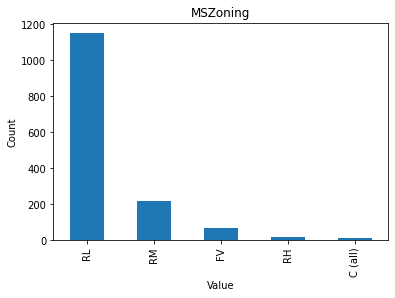

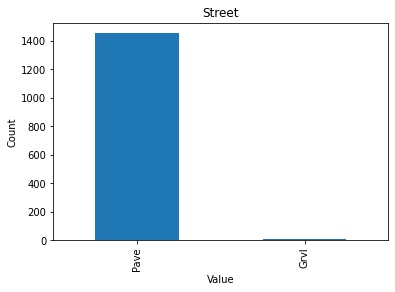

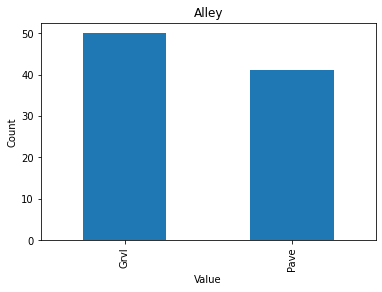

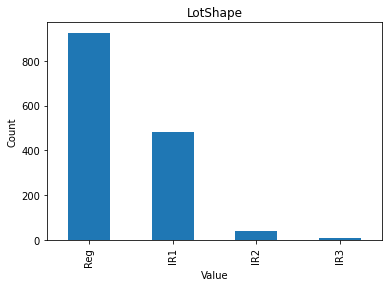

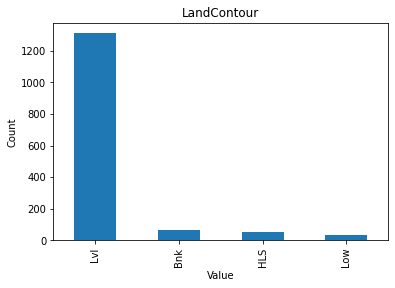

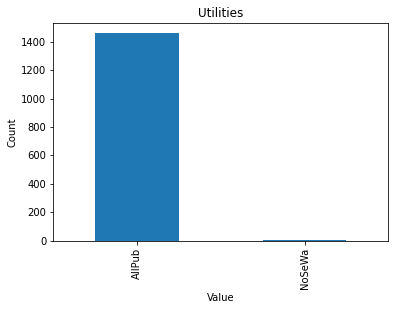

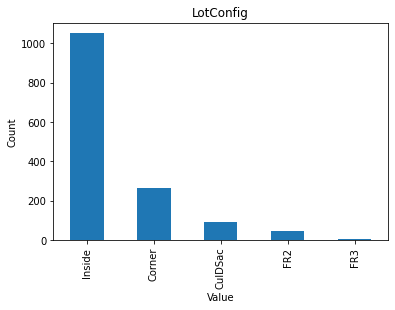

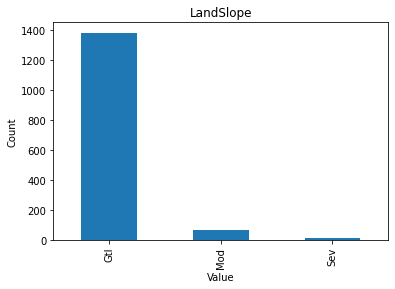

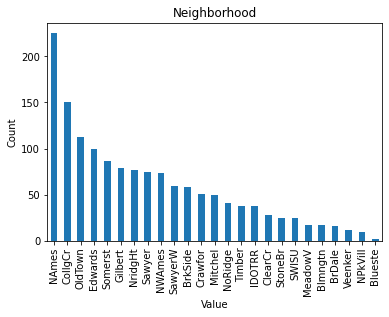

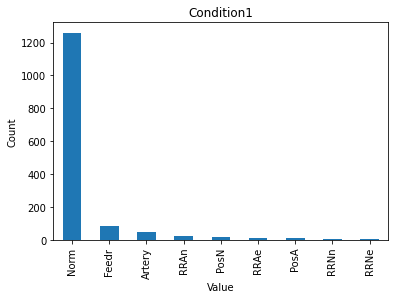

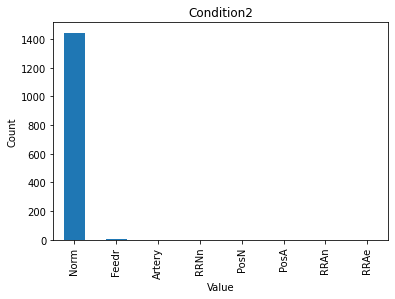

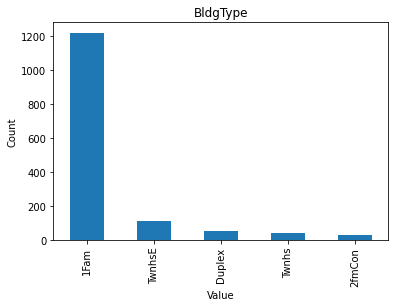

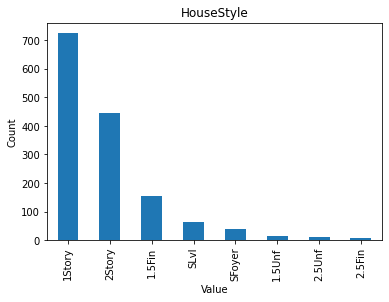

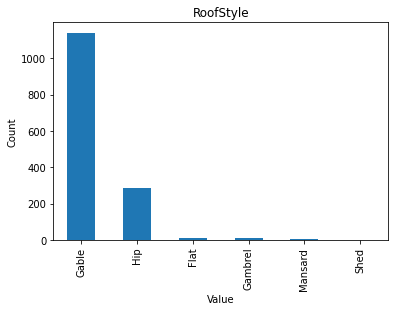

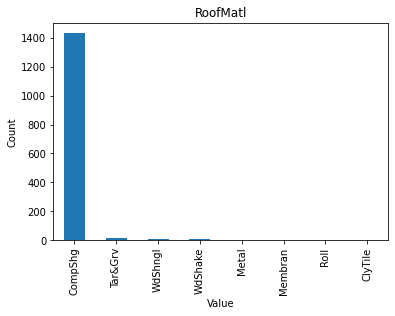

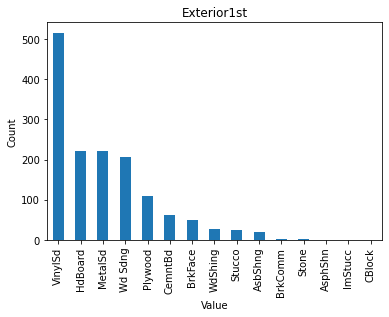

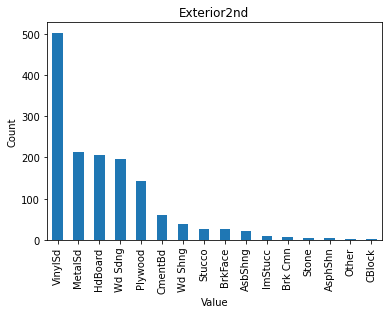

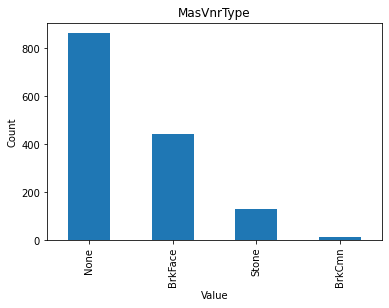

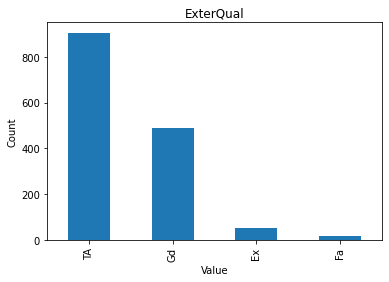

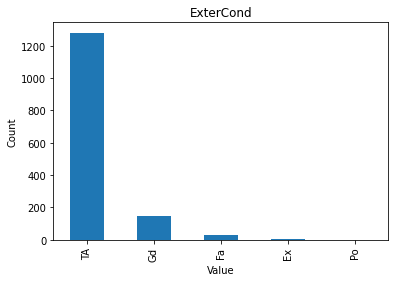

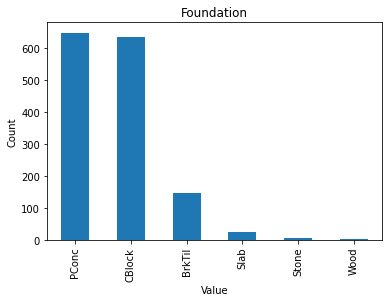

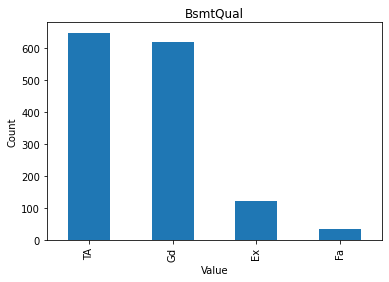

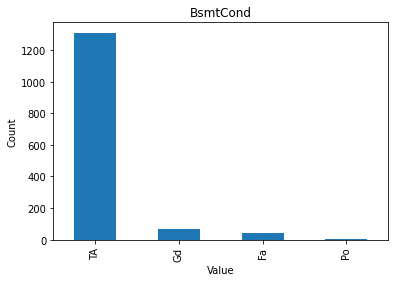

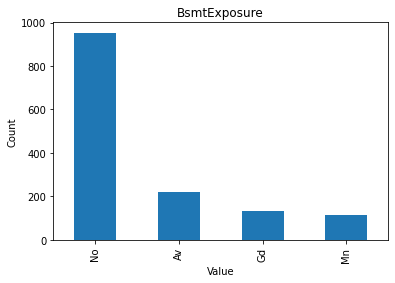

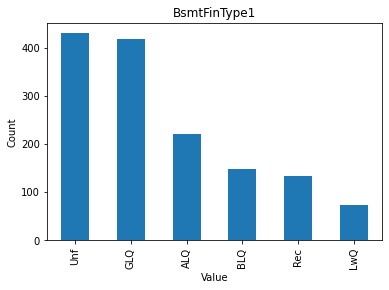

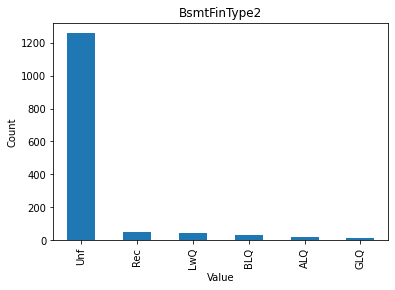

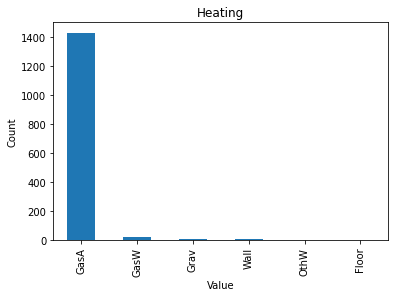

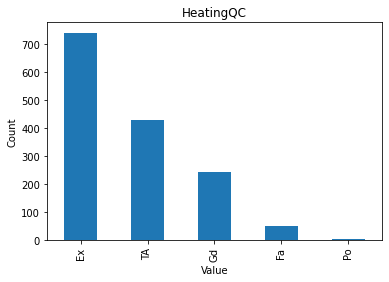

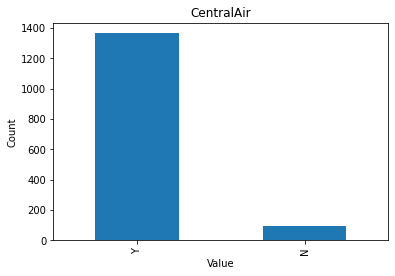

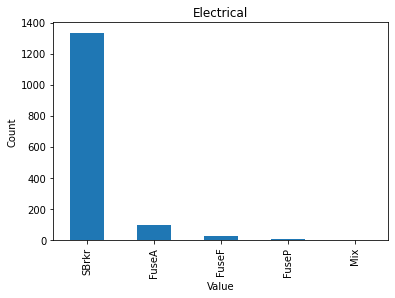

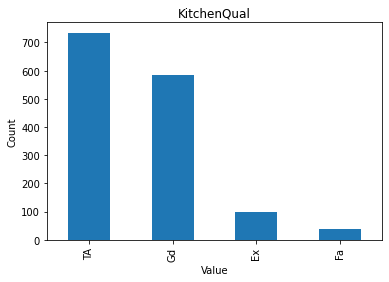

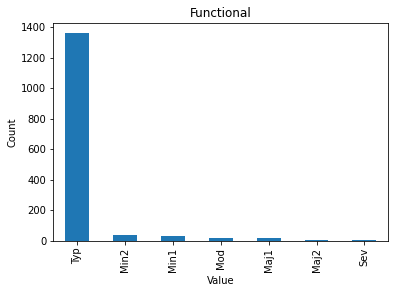

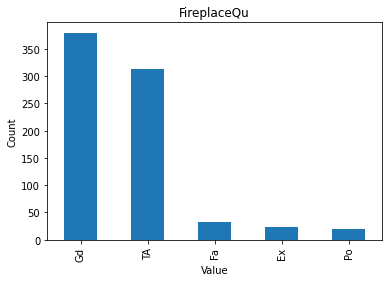

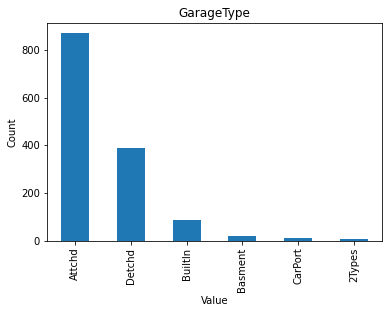

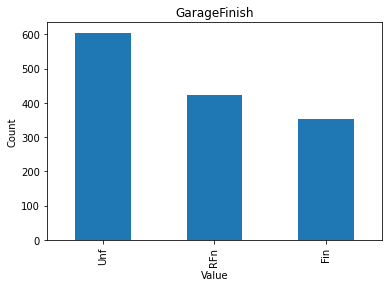

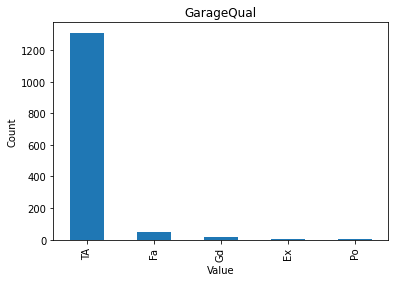

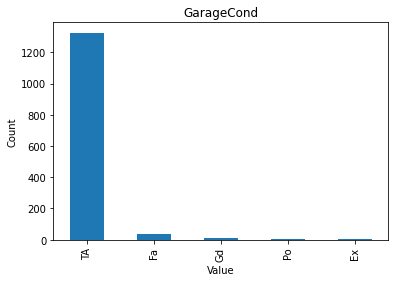

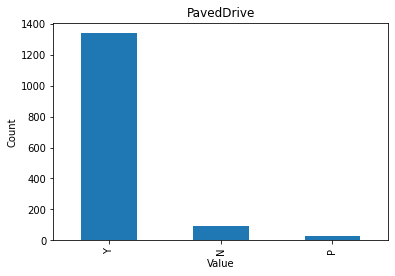

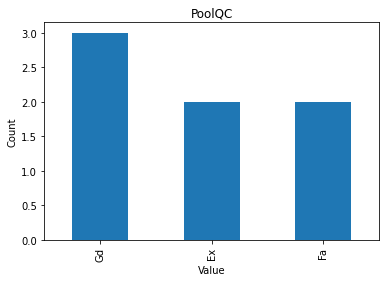

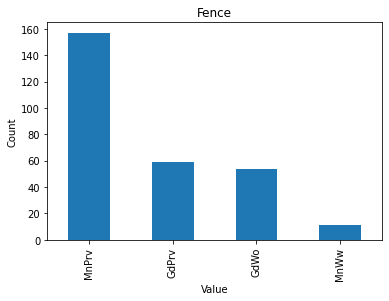

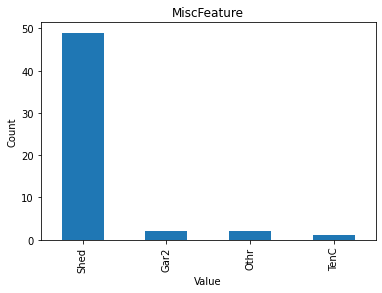

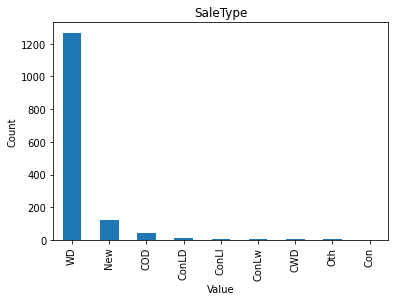

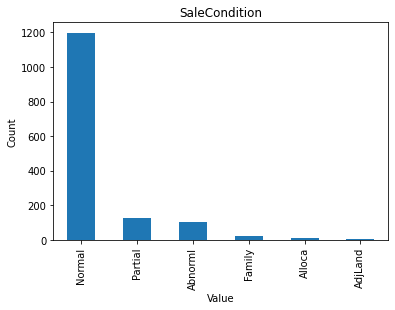

In [71]:
# Iterate over each column in the DataFrame
for column_name in df.columns:
    # Check if the column is a categorical variable
    if df[column_name].dtype == 'object':
        # Create a bar plot for the column
        df[column_name].value_counts().plot(kind='bar')
        plt.title(column_name)
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.show()

For loop to visualize each numerical column

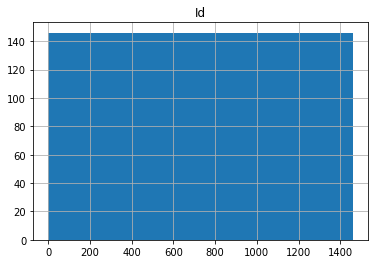

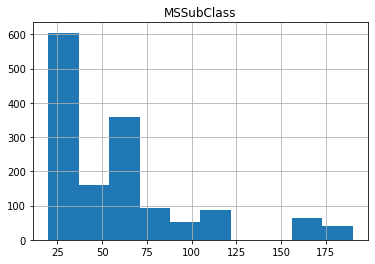

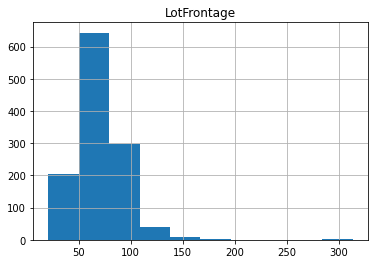

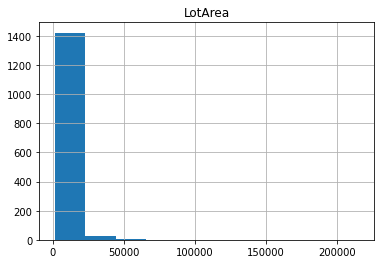

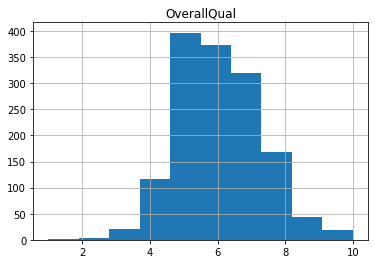

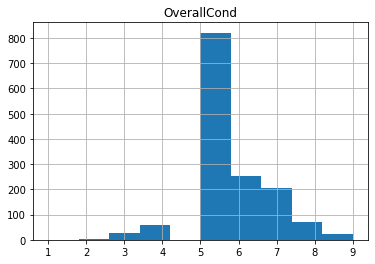

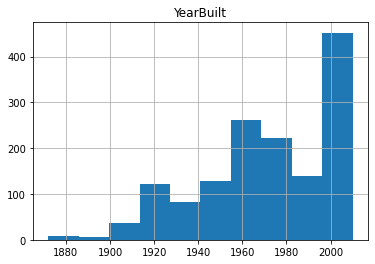

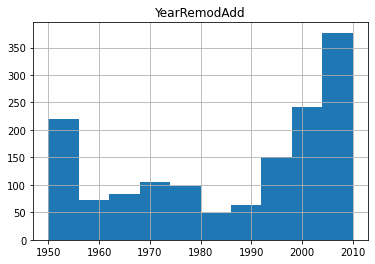

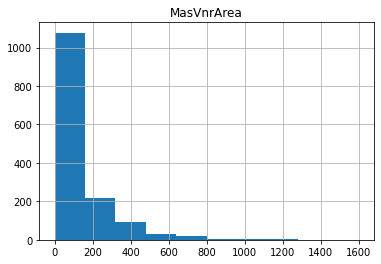

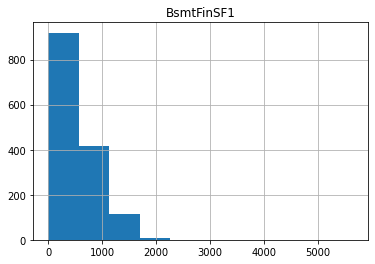

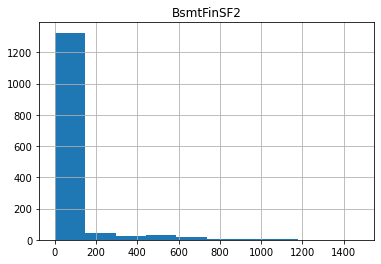

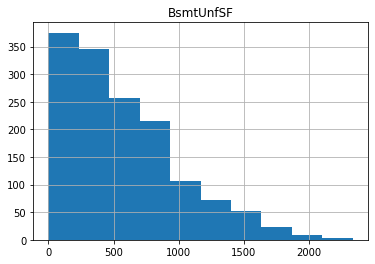

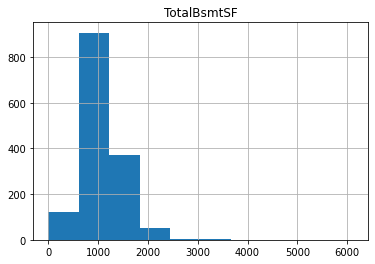

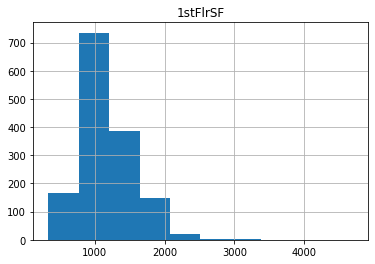

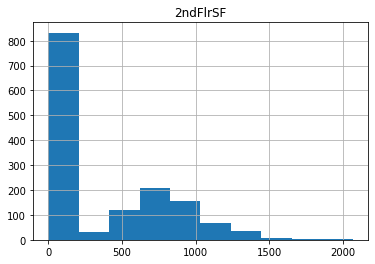

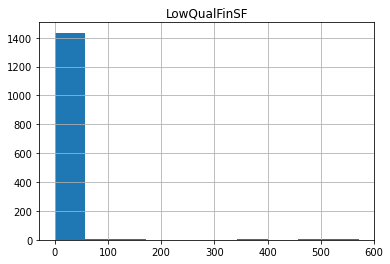

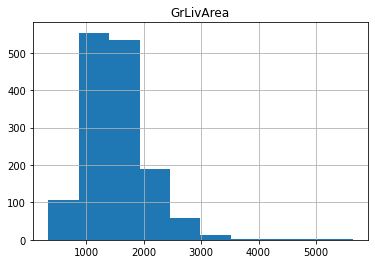

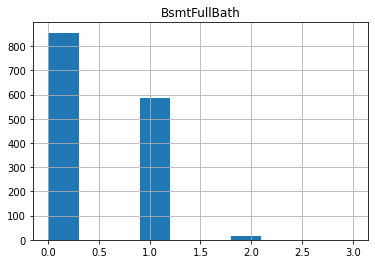

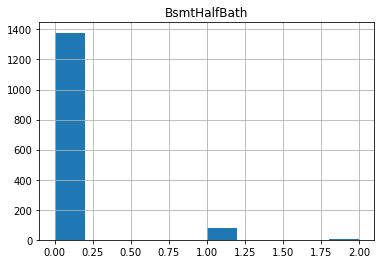

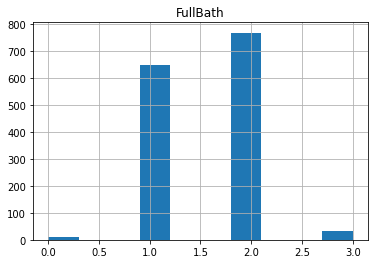

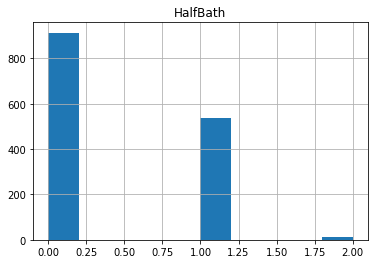

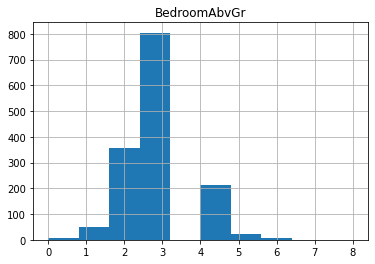

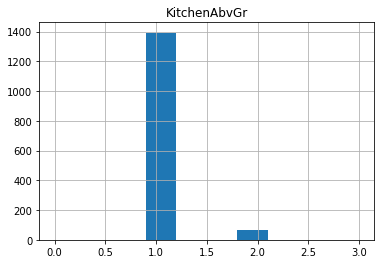

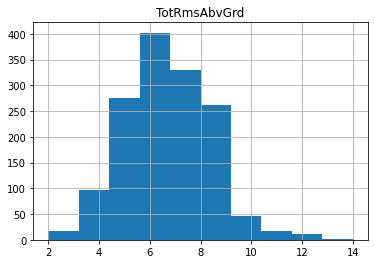

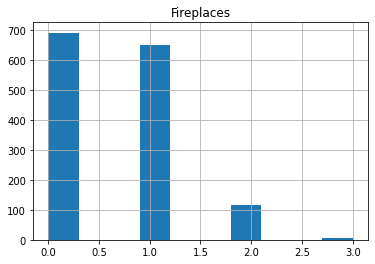

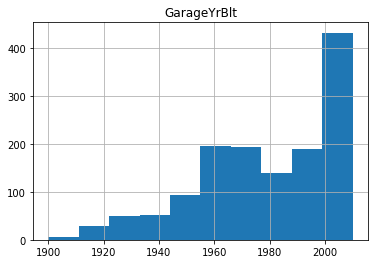

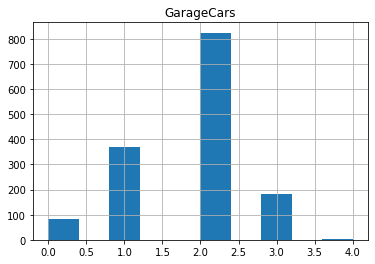

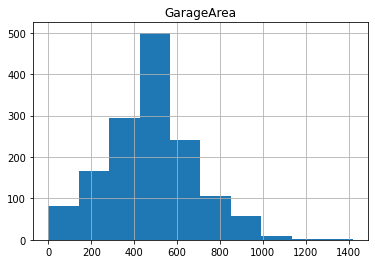

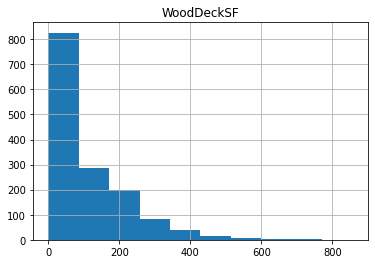

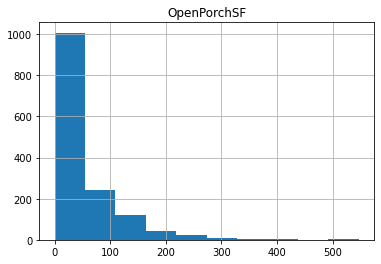

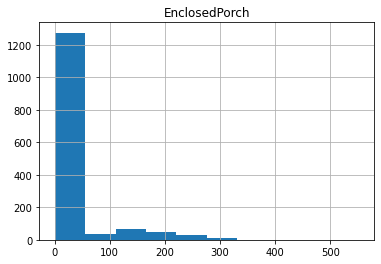

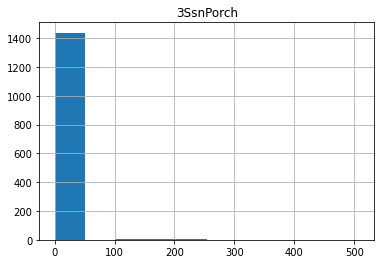

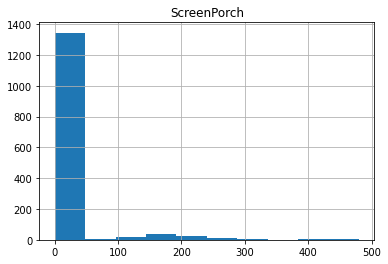

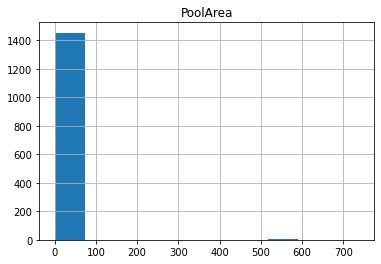

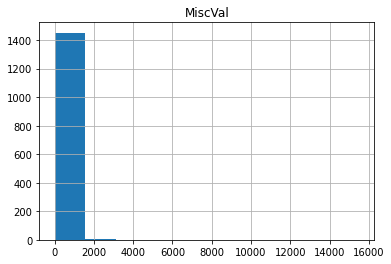

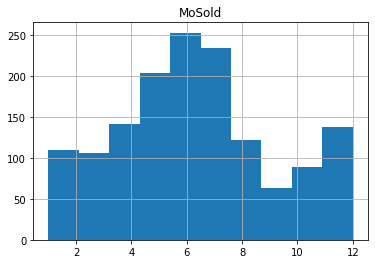

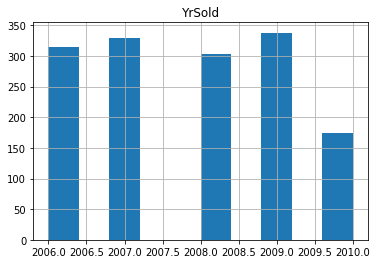

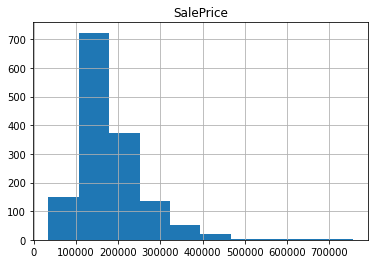

In [72]:
for column_name in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    df[column_name].hist()
    plt.title(column_name)
    plt.show()

In [73]:
#basic stats for all columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [74]:
# calculate the correlation between two numeric columns
print(df['LotArea'].corr(df['OverallQual']))

0.10580574175496403


In [75]:
# group the data by a categorical column and calculate statistics
grouped_df = df.groupby('SaleType')['SalePrice'].mean()
print(grouped_df)

SaleType
COD      143973.255814
CWD      210600.000000
Con      269600.000000
ConLD    138780.888889
ConLI    200390.000000
ConLw    143700.000000
New      274945.418033
Oth      119850.000000
WD       173401.836622
Name: SalePrice, dtype: float64


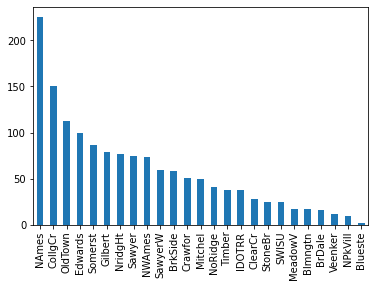

In [76]:
#Visualising 'Neighborhood' variable separately because it has many categories
df['Neighborhood'].value_counts().plot(kind='bar')
plt.show()

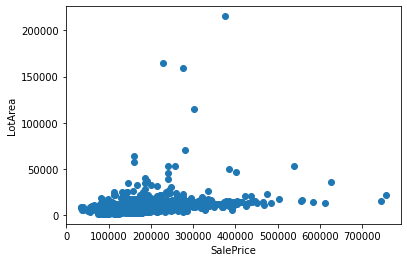

In [77]:
# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['SalePrice'], df['LotArea'])
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.show()

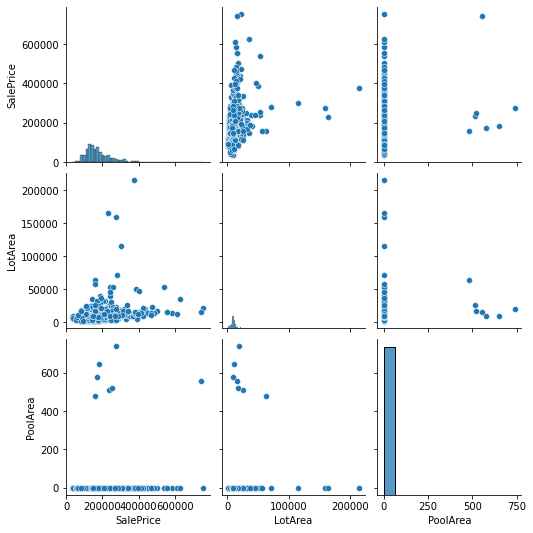

In [78]:
# create a pairplot to visualize the relationships between multiple numeric columns
sns.pairplot(df, vars=['SalePrice', 'LotArea', 'PoolArea'])
plt.show()

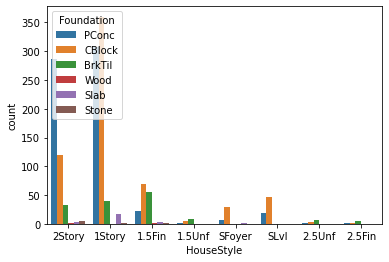

In [79]:
# create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='HouseStyle', hue='Foundation', data=df)
plt.show()

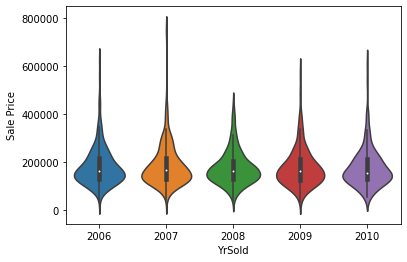

In [80]:
# create a violin plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.violinplot(x='YrSold', y='SalePrice', data=df)
plt.ylabel('Sale Price')
plt.show()

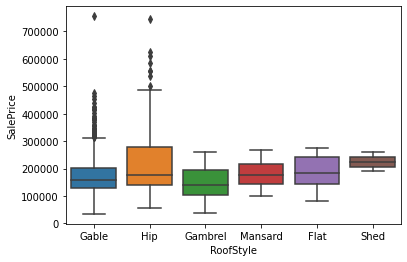

In [81]:
# create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxplot(x='RoofStyle', y='SalePrice', data=df)
plt.ylabel('SalePrice')
plt.show()

In [82]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

In [83]:
# Check for outliers
# for example if we have outliers in price column
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['SalePrice'] < (Q1 - 1.5 * IQR)) | (df['SalePrice'] > (Q3 + 1.5 * IQR))].shape[0]
#there is 61 outliers in the Sales Price column

Part 2 Data Pre Processing

In [84]:
# create a copy of the original DataFrame
df_copy= df.copy()

In [85]:
# Check for missing values in each column
missing_values = df_copy.isnull().sum()

# Calculate the percentage of missing values for each column
missing_values_percent = (missing_values / len(df_copy)) * 100

# Sort the missing values in descending order
missing_values_percent_sorted = missing_values_percent.sort_values(ascending=False)

# Print the percentage of missing values for each column in descending order
print(missing_values_percent_sorted)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

PoolQC, MiscFeature, Alley, and Fence columns should be dropped because of the high % of missing values.

In [86]:
#dropping columns that bring no value
df_copy = df_copy.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [87]:
# Check for missing values in each column
missing_values = df_copy.isnull().sum()

# Calculate the percentage of missing values for each column
missing_values_percent = (missing_values / len(df_copy)) * 100

# Sort the missing values in descending order
missing_values_percent_sorted = missing_values_percent.sort_values(ascending=False)

# Print the percentage of missing values for each column in descending order
print(missing_values_percent_sorted)

FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
KitchenQual       0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Id                0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
3SsnPorch         0.000000
2ndFlrSF          0.000000
EnclosedPorch     0.000000
O

Now for the FireplaceQu column I will drop the records with NaN values because the threshold of missing values is too low to completely drop the column and too high to use imputation

In [88]:
# Drop rows with 'NaN' values in the 'FireplaceQu' column
df_copy = df_copy.dropna(subset=['FireplaceQu'])

In [89]:
df_copy.FireplaceQu.head()
# i can now see that this column is ready to be used for analysis and has no more nulls

1    TA
2    TA
3    Gd
4    TA
6    Gd
Name: FireplaceQu, dtype: object

Next I will use imputation to fill in the missing values in the LotFrontage column

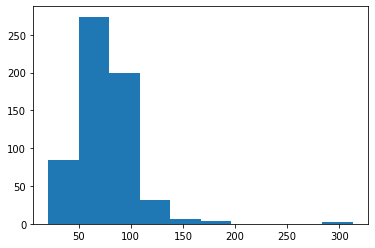

In [90]:
# visualize the distribution of LotFrontage column
plt.hist(df_copy['LotFrontage'])
plt.show()

I will use median for this imputation

In [91]:
#df_copy['LotFrontage'].fillna(df_copy['LotFrontage'].median(), inplace=True)

In [92]:
median = df_copy['LotFrontage'].median()

# Fill the missing values with the median
df_copy['LotFrontage'].fillna(median, inplace=True)

Now that the only missing values left in a column are around 1% the data is valid and no more imputation is needed.

Running this again I now see all missing values have been accounted for

In [93]:
# Check for missing values in each column
missing_values = df_copy.isnull().sum()

# Calculate the percentage of missing values for each column
missing_values_percent = (missing_values / len(df_copy)) * 100

# Sort the missing values in descending order
missing_values_percent_sorted = missing_values_percent.sort_values(ascending=False)

# Print the percentage of missing values for each column in descending order
print(missing_values_percent_sorted)

BsmtExposure     1.298701
BsmtFinType2     1.298701
GarageType       1.168831
GarageYrBlt      1.168831
GarageFinish     1.168831
GarageQual       1.168831
GarageCond       1.168831
BsmtQual         1.168831
BsmtCond         1.168831
BsmtFinType1     1.168831
MasVnrType       0.519481
MasVnrArea       0.519481
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
BsmtFullBath     0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
TotRmsAbvGrd     0.000000
Id               0.000000
FireplaceQu      0.000000
Functional       0.000000
Fireplaces       0.000000
SaleCondition    0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea  

In [94]:
print(df_copy.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  \
1   2          20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2  ...             0         0           0        0       0      5    2007        WD         Normal   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside  ...             0         0           0        0       0      9    2008        WD         Normal   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner  ...           272         0           0        0       0      2    2006        WD        Abnorml   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl    AllPub       FR2  ...             0         0           0        0       0     12    2008        WD         Normal   
6   7     

Outlier Analysis: For loop over each column to find # of outliers in each

In [95]:
# Create an empty dictionary to store the column name and the percentage of outliers
outliers_percent = {}

# Iterate over each column
for column_name in df_copy.columns:
    if pd.api.types.is_numeric_dtype(df_copy[column_name]):
        # Calculate the first and third quartile
        Q1 = df_copy[column_name].quantile(0.25)
        Q3 = df_copy[column_name].quantile(0.75)

        # Calculate the interquartile range
        IQR = Q3 - Q1

        # Identify the outliers
        outliers = df_copy[(df_copy[column_name] < (Q1 - 1.5 * IQR)) | (df_copy[column_name] > (Q3 + 1.5 * IQR))]
        
        # Calculate the percentage of outliers
        percent = (outliers.shape[0]/df_copy.shape[0])*100
        
        # Store the column name and the percentage of outliers in the dictionary
        outliers_percent[column_name] = percent

# Sort the dictionary by the percentage of outliers in descending order
sorted_outliers_percent = dict(sorted(outliers_percent.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
print(sorted_outliers_percent)

{'BedroomAbvGr': 41.688311688311686, 'GarageCars': 38.44155844155844, 'Fireplaces': 15.584415584415584, 'ScreenPorch': 11.948051948051948, 'BsmtFinSF2': 11.818181818181818, 'EnclosedPorch': 11.688311688311687, 'LotFrontage': 6.883116883116883, 'LotArea': 6.493506493506493, 'BsmtHalfBath': 6.363636363636363, 'OverallCond': 6.233766233766234, 'OpenPorchSF': 4.805194805194805, 'MasVnrArea': 4.545454545454546, 'MSSubClass': 3.6363636363636362, 'SalePrice': 3.2467532467532463, 'GarageArea': 3.116883116883117, 'MiscVal': 3.116883116883117, 'GrLivArea': 2.987012987012987, '3SsnPorch': 2.207792207792208, 'WoodDeckSF': 2.0779220779220777, 'BsmtUnfSF': 1.6883116883116882, 'KitchenAbvGr': 1.4285714285714286, 'TotalBsmtSF': 1.2987012987012987, '1stFlrSF': 1.2987012987012987, 'LowQualFinSF': 1.1688311688311688, 'TotRmsAbvGrd': 1.0389610389610389, 'PoolArea': 0.9090909090909091, 'YearBuilt': 0.6493506493506493, 'BsmtFinSF1': 0.38961038961038963, 'GarageYrBlt': 0.2597402597402597, 'OverallQual': 0.12

The BedroomAbvGr and GarageCars columns have a high % of outliers so I will examine them more

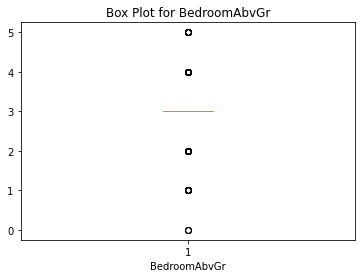

In [96]:
# Create a box plot for the "BedroomAbvGr" column
plt.boxplot(df_copy['BedroomAbvGr'])

# Add a title and x-axis label
plt.title('Box Plot for BedroomAbvGr')
plt.xlabel('BedroomAbvGr')

# Show the plot
plt.show()

The boxplot shows the outliers are valid and these could be larger houses, such as mansions that have many more bedrooms on average

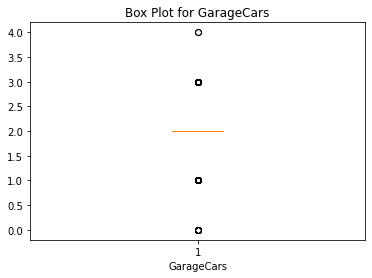

In [97]:
# Create a box plot for the "GarageCars" column
plt.boxplot(df_copy['GarageCars'])

# Add a title and x-axis label
plt.title('Box Plot for GarageCars')
plt.xlabel('GarageCars')

# Show the plot
plt.show()

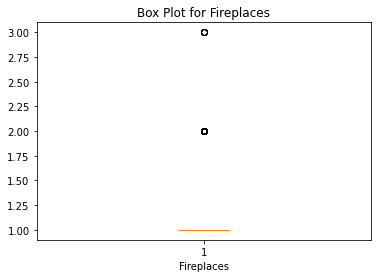

In [98]:
# Create a box plot for the "Fireplaces" column
plt.boxplot(df_copy['Fireplaces'])

# Add a title and x-axis label
plt.title('Box Plot for Fireplaces')
plt.xlabel('Fireplaces')

# Show the plot
plt.show()

Similarly, after creating box plots I can see the outliers are valid numbers and are houses with more cars in the garages and fireplaces etc.

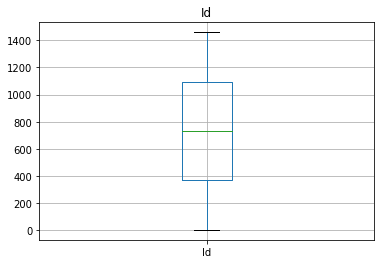

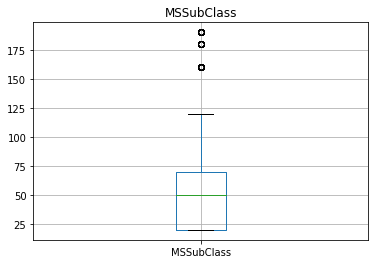

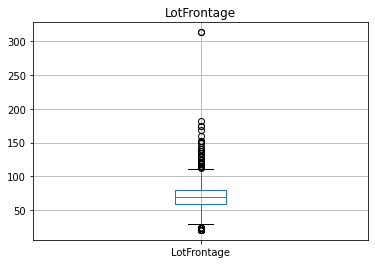

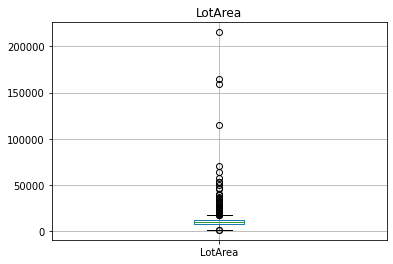

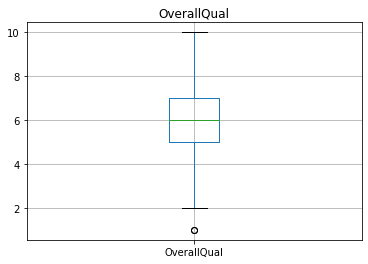

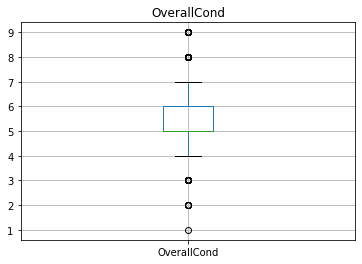

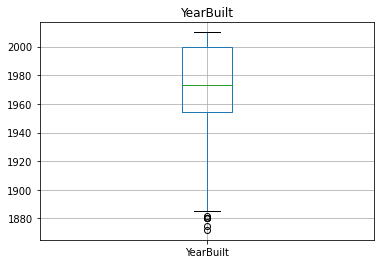

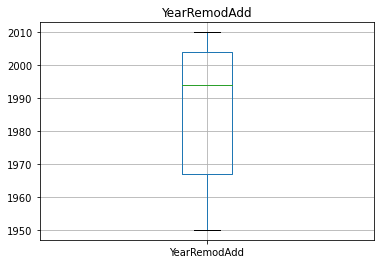

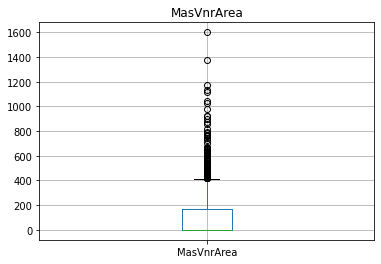

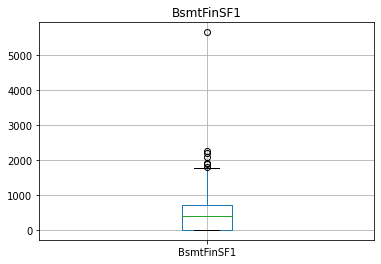

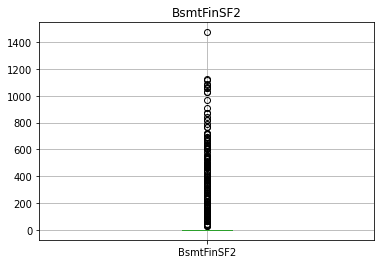

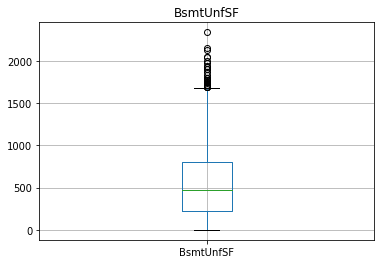

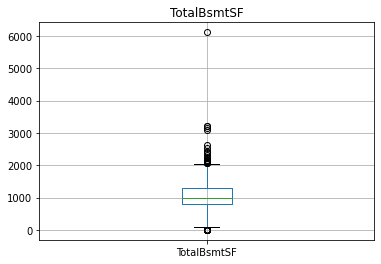

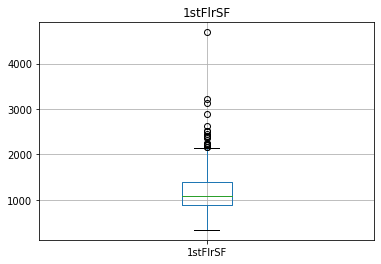

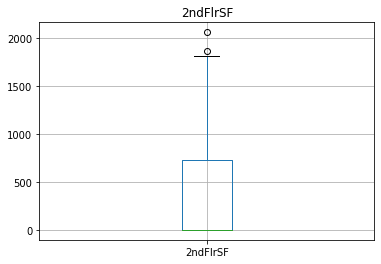

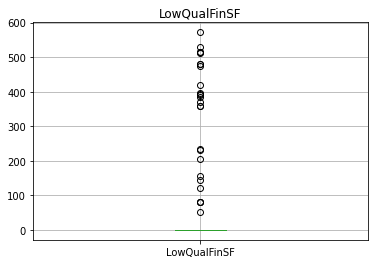

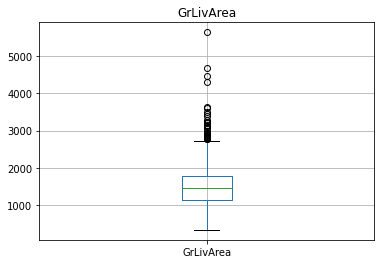

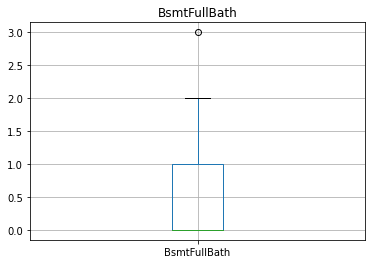

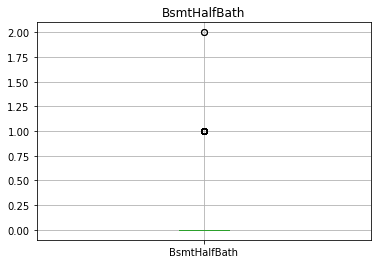

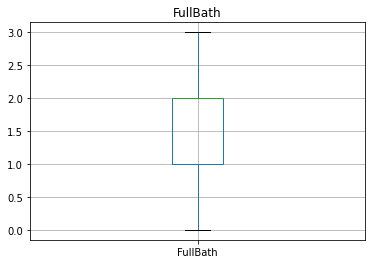

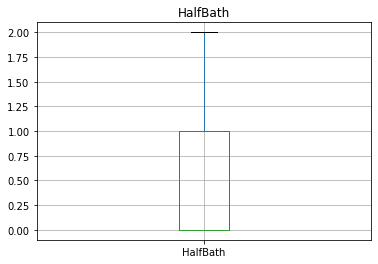

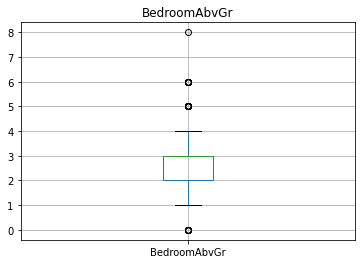

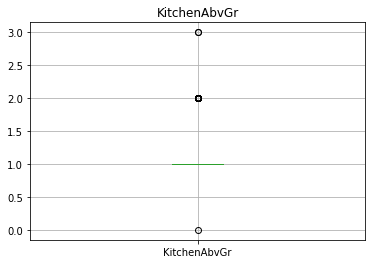

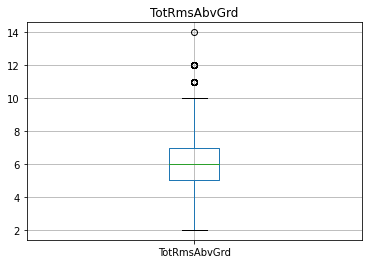

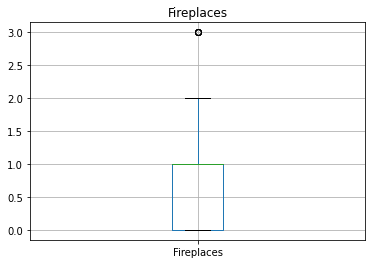

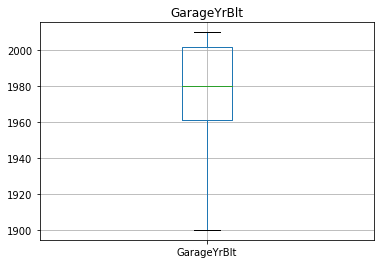

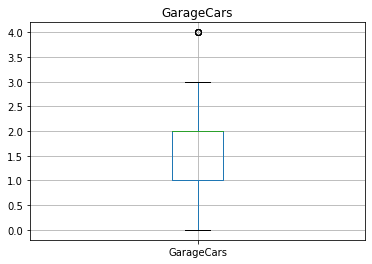

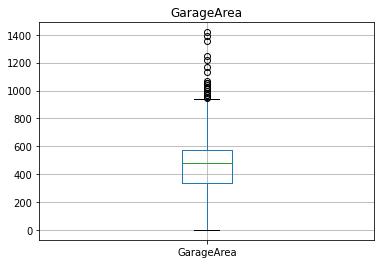

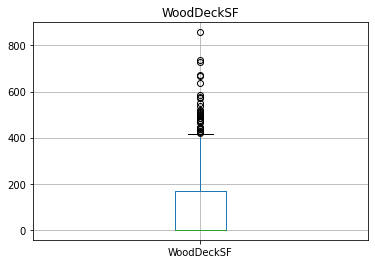

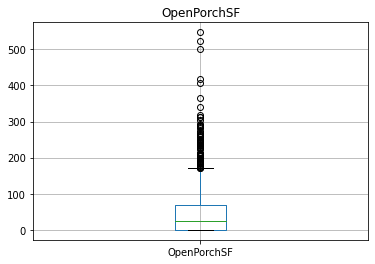

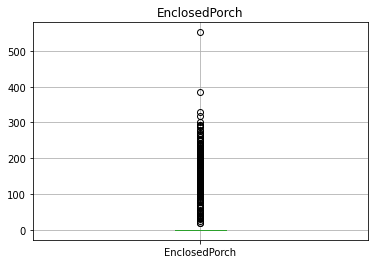

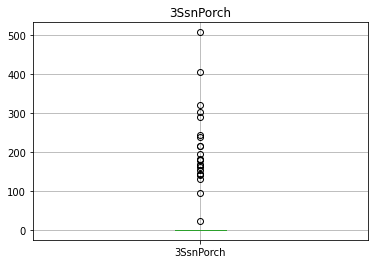

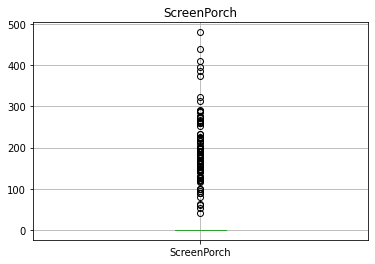

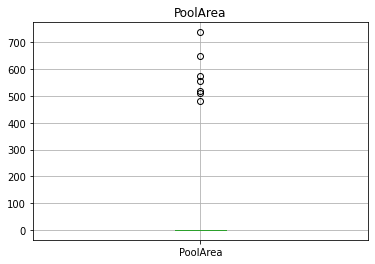

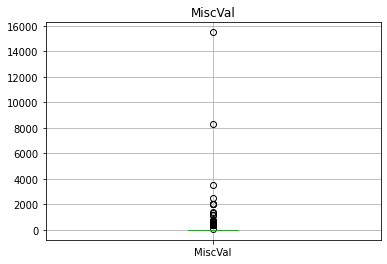

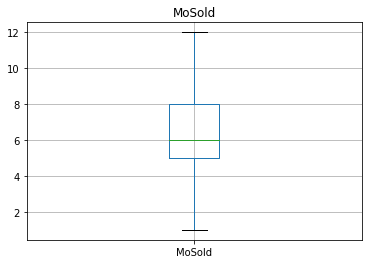

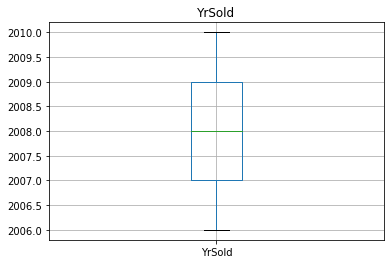

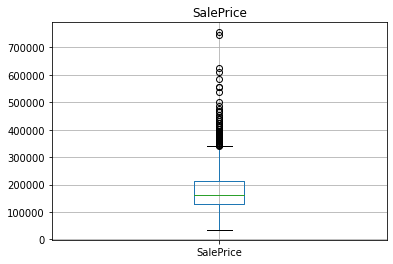

In [99]:
numerical_columns = []

# Iterate over each column in the DataFrame
for column_name in df_copy.columns:
    # Check if the column is numerical
    if df_copy[column_name].dtype in ['float64', 'int64']:
        numerical_columns.append(column_name)

# Iterate over each numerical column
for column in numerical_columns:
    # Create a boxplot for the column
    plt.figure()
    df.boxplot([column])
    plt.title(column)
    plt.show()

Encoding

In [100]:
#Encoding categorical variables using one-hot encoding

df_no_missing_value = df_copy.copy()
df_preprocessed_again = pd.get_dummies(df_no_missing_value, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], prefix=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])

In [101]:
print(df_preprocessed_again.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_WD  \
1   2          20         80.0     9600            6            8       1976          1976         0.0         978  ...               0               0               0             0            1   
2   3          60         68.0    11250            7            5       2001          2002       162.0         486  ...               0               0               0             0            1   
3   4          70         60.0     9550            7            5       1915          1970         0.0         216  ...               0               0               0             0            1   
4   5          60         84.0    14260            8            5       2000          2000       350.0         655  ...               0               0               0             0            1   
6   7     

Standardizing Numeric columns

In [102]:
#Standardizing the values of LotArea 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_preprocessed_again['LotArea_scaled'] = scaler.fit_transform(df_preprocessed_again[['LotArea']])

In [103]:
print(df_preprocessed_again['LotArea_scaled'].head())

1   -0.202397
2   -0.076075
3   -0.206225
4    0.154366
6   -0.165342
Name: LotArea_scaled, dtype: float64


Binning and Scaling Examples

In [104]:
#Binning the values of LotArea

from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal')
df_preprocessed_again['LotArea_binned'] = discretizer.fit_transform(df_preprocessed_again[['LotArea']])

In [105]:
#Applying a min-max scaling to LotArea

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_preprocessed_again['LotArea_scaled_minmax'] = scaler.fit_transform(df_preprocessed_again[['LotArea']])

In [106]:
#robust scaling to LotArea

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_preprocessed_again['LotArea_scaled_robust'] = scaler.fit_transform(df_preprocessed_again[['LotArea']])

In [107]:
print(df_preprocessed_again.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_WD  SaleCondition_Abnorml  SaleCondition_Alloca  \
1   2          20         80.0     9600            6            8       1976          1976         0.0         978  ...            1                      0                     0   
2   3          60         68.0    11250            7            5       2001          2002       162.0         486  ...            1                      0                     0   
3   4          70         60.0     9550            7            5       1915          1970         0.0         216  ...            1                      1                     0   
4   5          60         84.0    14260            8            5       2000          2000       350.0         655  ...            1                      0                     0   
6   7          20         75.0    10084            8            5       2004          2005     

Statistics after EDA

In [108]:
df_preprocessed_again.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotArea_scaled,LotArea_binned,LotArea_scaled_minmax,LotArea_scaled_robust
count,770.00,770.00,770.00,770.00,770.00,770.00,770.00,770.00,766.00,770.00,...,770.00,770.00,770.00,770.00,770.00,770.00,770.00,770.00,770.00,770.00
mean,728.79,55.53,75.62,12243.69,6.67,5.52,1977.58,1988.18,148.28,523.29,...,0.85,0.05,0.01,0.01,0.82,0.11,0.00,2.50,0.05,0.39
std,422.02,36.81,24.02,13070.38,1.30,1.01,28.03,19.19,216.93,520.66,...,0.36,0.21,0.07,0.11,0.38,0.32,1.00,1.71,0.06,2.93
min,2.00,20.00,21.00,1300.00,2.00,2.00,1880.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.84,0.00,0.00,-2.06
25%,367.25,20.00,63.00,8450.00,6.00,5.00,1960.00,1975.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,-0.29,1.00,0.03,-0.46
50%,708.50,60.00,75.00,10488.00,7.00,5.00,1981.00,1996.00,20.00,454.00,...,1.00,0.00,0.00,0.00,1.00,0.00,-0.13,2.50,0.04,0.00
75%,1105.50,60.00,82.00,12913.75,8.00,6.00,2003.00,2005.00,245.75,862.75,...,1.00,0.00,0.00,0.00,1.00,0.00,0.05,4.00,0.05,0.54
max,1458.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,1.00,1.00,1.00,1.00,1.00,1.00,15.54,5.00,1.00,45.87


Skewness

In [109]:
df_preprocessed_again.skew()

Id                        0.031624
MSSubClass                1.327764
LotFrontage               3.063183
LotArea                   9.923769
OverallQual               0.212646
OverallCond               1.214621
YearBuilt                -0.870950
YearRemodAdd             -0.797413
MasVnrArea                2.163468
BsmtFinSF1                1.720594
BsmtFinSF2                4.264710
BsmtUnfSF                 0.940035
TotalBsmtSF               1.999136
1stFlrSF                  1.382364
2ndFlrSF                  0.544447
LowQualFinSF             10.338554
GrLivArea                 1.547731
BsmtFullBath              0.387945
BsmtHalfBath              3.780866
FullBath                 -0.332382
HalfBath                  0.238452
BedroomAbvGr             -0.377044
KitchenAbvGr              8.202225
TotRmsAbvGrd              0.533568
Fireplaces                2.168990
GarageYrBlt              -0.852364
GarageCars               -0.210254
GarageArea                0.560268
WoodDeckSF          

Part 3: Post Processing /Colliearity

In [110]:
df_post = df_preprocessed_again.copy()

Pairplots for Collinearity

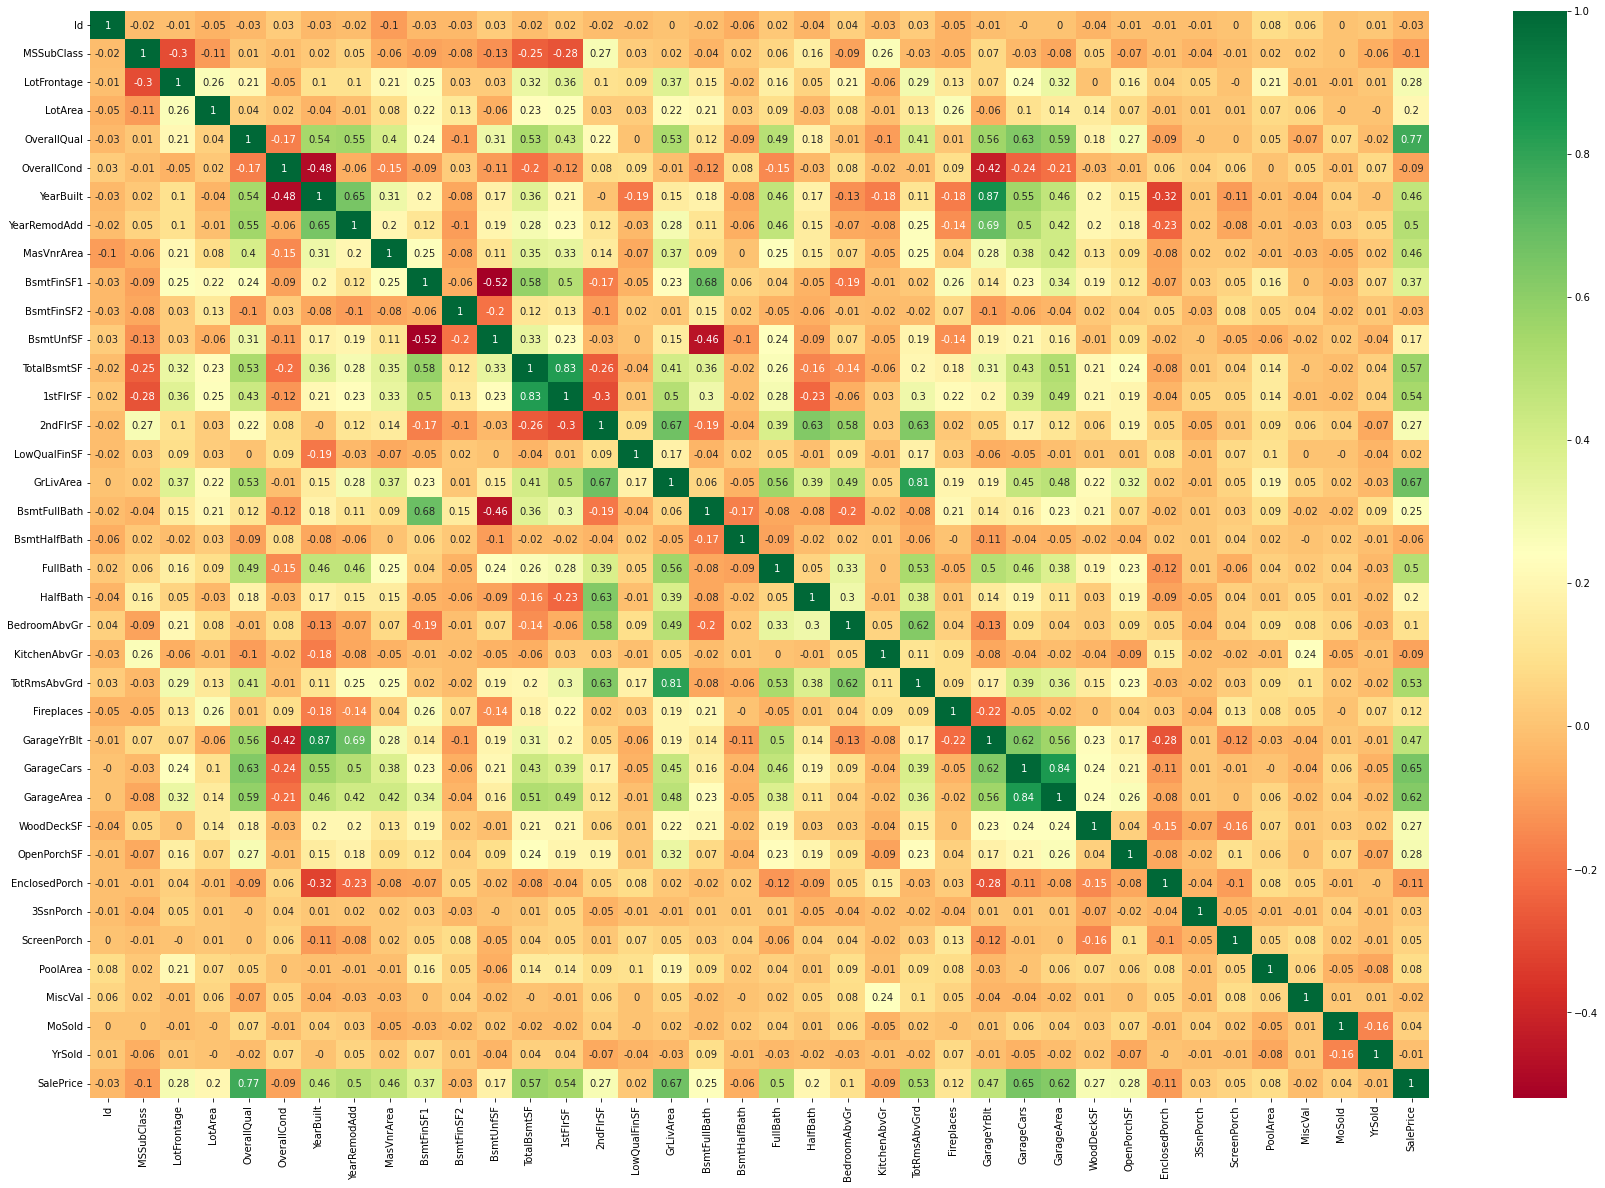

In [111]:
# create a heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(30, 20))
corr_matrix = df_copy.corr().round(2) # round the correlation matrix to 2 decimal places
sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True) # use the rounded correlation matrix for the heatmap
plt.show()

This heatmap shows me which variables have strong relationships with each other. As we are interested in predicing sale price, all the green columns are highly correlated, which will influence collinearity, and should be features removed.

Feature selection:
Looking at the SalePrice column, we can see the features that need to be removed are OverallQual, GrLivArea, GarageCars, GarageArea as they show high collinearity.

In [112]:
corr_matrix = df_copy.corr()

# Print the correlation matrix
print(corr_matrix)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id             1.000000   -0.023988    -0.007750 -0.047922    -0.029453     0.026049  -0.034907     -0.018299   -0.101091   -0.033740  ...   -0.041943    -0.008064      -0.012136  -0.010865   
MSSubClass    -0.023988    1.000000    -0.304166 -0.110389     0.006349    -0.007063   0.018080      0.051069   -0.062501   -0.090235  ...    0.047307    -0.073498      -0.006079  -0.038975   
LotFrontage   -0.007750   -0.304166     1.000000  0.257347     0.211699    -0.048334   0.095866      0.103777    0.209530    0.253868  ...    0.003576     0.161092       0.042963   0.045226   
LotArea       -0.047922   -0.110389     0.257347  1.000000     0.038396     0.017673  -0.041256     -0.012169    0.075153    0.215898  ...    0.143098     0.073008      -0.010736   0.006651   
OverallQual   -0.029453    0.006349

The correlation matrix shows the correlation coefficient between all pairs of variables, which can be used to identify highly correlated variables, those with a correlation coefficient close to 1 or -1).